# Math 189Z Final Project: Topic and Sentiment Distribution Analysis across Various COVID-19 Media

# Project Description

We used Latent Dirichlet allocation to determine topics covered in news articles, TV broadcasts, and tweets relating to COVID-19. Additionally, we analyze the sentiments (positive, negative, neutral) in the messages propagated by these outlets using sentiment analysis. 

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob

# Loading the data

## Scientific Articles

In [6]:
frame = pd.read_csv('Scientific Articles Data/metadata.csv')
data = pd.DataFrame(columns = ['Time', 'Snippet']) 

data['Snippet'] = frame['abstract']
data['Time'] = frame['publish_time']
#data.dropna(inplace=True)

data.dropna()
data.reset_index(drop=True)

data.head()

,Time,Snippet
0,2001-12-17,Nidovirus subgenomic mRNAs contain a leader se...
1,2002-05-01,CEACAM1 is a member of the carcinoembryonic an...
2,2001-07-16,Hepatitis C virus (HCV) is an important human ...
3,2002-07-01,The key enzyme in coronavirus polyprotein proc...
4,2002-12-01,"Arteri-, corona-, toro- and roniviruses are ev..."


In [7]:
listFrames = []
for i in range(0, 21): 
    frame = pd.DataFrame(columns = ['Snippet', "Time"])
    listFrames.append(frame)

length = len(data)
for i in range(0, length):
    if (isinstance(data['Time'][i], str)):
        if (data['Time'][i][0:4] == '2000'):
            listFrames[0] = listFrames[0].append(data.loc[i])
        if (data['Time'][i][0:4] == '2001'):
            listFrames[1] = listFrames[1].append(data.loc[i])
        if (data['Time'][i][0:4] == '2002'):
            listFrames[2] = listFrames[2].append(data.loc[i])
        if (data['Time'][i][0:4] == '2003'):
            listFrames[3] = listFrames[3].append(data.loc[i])
        if (data['Time'][i][0:4] == '2004'):
            listFrames[4] = listFrames[4].append(data.loc[i])
        if (data['Time'][i][0:4] == '2005'):
            listFrames[5] = listFrames[5].append(data.loc[i])
        if (data['Time'][i][0:4] == '2006'):
            listFrames[6] = listFrames[6].append(data.loc[i])
        if (data['Time'][i][0:4] == '2007'):
            listFrames[7] = listFrames[7].append(data.loc[i])
        if (data['Time'][i][0:4] == '2008'):
            listFrames[8] = listFrames[8].append(data.loc[i])
        if (data['Time'][i][0:4] == '2009'):
            listFrames[9] = listFrames[9].append(data.loc[i])
        if (data['Time'][i][0:4] == '2010'):
            listFrames[10] = listFrames[10].append(data.loc[i])
        if (data['Time'][i][0:4] == '2011'):
            listFrames[11] = listFrames[11].append(data.loc[i])
        if (data['Time'][i][0:4] == '2012'):
            listFrames[12] = listFrames[12].append(data.loc[i])
        if (data['Time'][i][0:4] == '2013'):
            listFrames[13] = listFrames[13].append(data.loc[i])
        if (data['Time'][i][0:4] == '2014'):
            listFrames[14] = listFrames[14].append(data.loc[i])
        if (data['Time'][i][0:4] == '2015'):
            listFrames[15] = listFrames[15].append(data.loc[i])
        if (data['Time'][i][0:4] == '2016'):
            listFrames[16] = listFrames[16].append(data.loc[i])
        if (data['Time'][i][0:4] == '2017'):
            listFrames[17] = listFrames[17].append(data.loc[i])
        if (data['Time'][i][0:4] == '2018'):
            listFrames[18] = listFrames[18].append(data.loc[i])
        if (data['Time'][i][0:4] == '2019'):
            listFrames[19] = listFrames[19].append(data.loc[i])
        if (data['Time'][i][0:4] == '2020'):
            listFrames[20] = listFrames[20].append(data.loc[i])

In [8]:
LastYwithDate = listFrames[20]


counter = 2000
for frame in listFrames:
    frame = frame['Snippet']
    #print("Number of papers:", str(len(frame)), "Year:", str(counter))
    counter += 1
    
LastYwithDate.dropna(inplace=True)        
LastYwithDate.reset_index(drop=True)

,Snippet,Time
0,Diabetes mellitus and hypertension are recogni...,2020-01-12
1,We detected bovine kobuvirus (BKV) in calves w...,2020-01-12
2,We examined nasal swabs and serum samples acqu...,2020-01-12
3,Influenza D virus (IDV) can potentially cause ...,2020-01-12
4,Cetuximab improves the survival of patients wi...,2020-01-01
...,...,...
9093,"From 29 to 31 January 2020, a total of 565 Jap...",2020-02-04
9094,"Abstract Human coronavirus, hCoV-19, is highly...",2020-03-31
9095,Since the emergence of coronavirus disease 201...,2020
9096,Abstract Corona virus disease 2019 (COVID-19) ...,2020-07-31


In [9]:
TotalY = pd.DataFrame(columns = ['Snippet']) 
Last10Y = pd.DataFrame(columns = ['Snippet']) 
Last5Y = pd.DataFrame(columns = ['Snippet'])
LastY = pd.DataFrame(columns = ['Snippet'])

for frame in listFrames:
    TotalY = TotalY.append(frame)
    
for i in (0, len(listFrames)):
    if (i > 10): 
        Last10Y = Last10Y.append(frame)
        
for i in (0, len(listFrames)):
    if (i > 15): 
        Last5Y = Last5Y.append(frame)
        
for i in (0, len(listFrames)):
    if (i > 19): 
        LastY = LastY.append(frame)
        
TotalY.dropna(inplace=True)        
temp1 = TotalY.reset_index(drop=True)
TotalY = temp1.drop(columns = ["Time"])     

    
Last10Y.dropna(inplace=True)        
temp2 = Last10Y.reset_index(drop=True)
Last10Y = temp2.drop(columns = ["Time"])

Last5Y.dropna(inplace=True)        
temp3 = Last5Y.reset_index(drop=True)
Last5Y = temp3.drop(columns = ["Time"])

LastY.dropna(inplace=True)        
temp4 = LastY.reset_index(drop=True)
LastY = temp4.drop(columns = ["Time"])

In [10]:
TotalY.head()

,Snippet
0,Heterogeneous nuclear ribonucleoprotein (hnRNP...
1,We examined the role of the microtubule cytosk...
2,Nitric oxide (NO) has complex and diverse func...
3,Transgenic plants represent an inexpensive alt...
4,To group infectious bronchitis virus (IBV) iso...


In [11]:
LastYwD = LastYwithDate
LastYwD.dropna(inplace=True)        
df = LastYwD.reset_index(drop=True)
LastYwD = df

LastYwD_jan = pd.DataFrame(columns = ['Snippet']) 
LastYwD_feb = pd.DataFrame(columns = ['Snippet'])
LastYwD_mar = pd.DataFrame(columns = ['Snippet'])

length = len(LastYwD['Snippet'])
for i in range(0, length):
    if (len(LastYwD['Time'][i]) > 4):
        if (LastYwD['Time'][i][6] == "1"):
            LastYwD_jan = LastYwD_jan.append(LastYwD.loc[i])
        elif (LastYwD['Time'][i][6] == "2"):
            LastYwD_feb = LastYwD_feb.append(LastYwD.loc[i])
        elif(LastYwD['Time'][i][6] == "3"):
            LastYwD_mar = LastYwD_mar.append(LastYwD.loc[i])

In [12]:
LastYwD_jan.drop(['Time'], axis=1, inplace=True)
LastYwD_feb.drop(['Time'], axis=1, inplace=True)
LastYwD_mar.drop(['Time'], axis=1, inplace=True)
LastYwD.drop(['Time'], axis=1, inplace=True)

In [13]:
LastYwD.head()

,Snippet
0,Diabetes mellitus and hypertension are recogni...
1,We detected bovine kobuvirus (BKV) in calves w...
2,We examined nasal swabs and serum samples acqu...
3,Influenza D virus (IDV) can potentially cause ...
4,Cetuximab improves the survival of patients wi...


## TV Broadcasts

### ABC

In [68]:
ABC = pd.read_csv('ABC-EveningNews.csv')
ABC_jan = pd.DataFrame(columns = ['Snippet'])
ABC_feb = pd.DataFrame(columns = ['Snippet'])
ABC_mar = pd.DataFrame(columns = ['Snippet'])

ABC.drop(['URL', 'Station', 'Show', 'IAShowID', 'IAPreviewThumb'], axis=1, inplace=True)



length = len(ABC['Snippet'])
for i in range(0, length):
    if (ABC['MatchDateTime'][i][0] == "1"):
        ABC_jan = ABC_jan.append(ABC.loc[i])
    elif (ABC['MatchDateTime'][i][0] == "2"):
        ABC_feb = ABC_feb.append(ABC.loc[i])
    elif(ABC['MatchDateTime'][i][0] == "3"):
        ABC_mar = ABC_mar.append(ABC.loc[i])
  

ABC.drop(['MatchDateTime'], axis=1, inplace=True)
ABC_jan.drop(['MatchDateTime'], axis=1, inplace=True)
ABC_feb.drop(['MatchDateTime'], axis=1, inplace=True)
ABC_mar.drop(['MatchDateTime'], axis=1, inplace=True)

ABC.head()

,Snippet
0,i no longer believe that the risk to the gener...
1,an anxious public in the wake of california's ...
2,"we can go for days feeling fine. it hits very,..."
3,it comes amid troubling images overseas. the a...
4,again tonight. reporter: aboard the diamond pr...


### Bloomberg

In [69]:
bloom_jan = pd.read_csv('BLOOMBERG.202001.csv')
bloom_feb = pd.read_csv('BLOOMBERG.202002.csv')
bloom_mar = pd.read_csv('BLOOMBERG.202003.csv')

bloom = pd.concat([bloom_jan, bloom_feb, bloom_mar]).reset_index(drop=True)
bloom.drop(['URL','MatchDateTime','Station','Show','IAShowID','IAPreviewThumb'], axis=1, inplace=True)
bloom.head()

,Snippet
0,the coronavirus sending investors into the unk...
1,coronavirus is in china -- coronavirus in chin...
2,and virus fears. china's coronavirus worries g...
3,"new virus, or is this new territory? it is a n..."
4,related the coronavirus. more than 600 people ...


### CBS

In [70]:
CBS = pd.read_csv('CBS-EveningNews.csv')
CBS_jan = pd.DataFrame(columns = ['Snippet'])
CBS_feb = pd.DataFrame(columns = ['Snippet'])
CBS_mar = pd.DataFrame(columns = ['Snippet'])

CBS.drop(['URL', 'Station', 'Show', 'IAShowID', 'IAPreviewThumb'], axis=1, inplace=True)



length = len(CBS['Snippet'])
for i in range(0, length):
    if (CBS['MatchDateTime'][i][0] == "1"):
        CBS_jan = CBS_jan.append(CBS.loc[i])
    elif (CBS['MatchDateTime'][i][0] == "2"):
        CBS_feb = CBS_feb.append(CBS.loc[i])
    elif(CBS['MatchDateTime'][i][0] == "3"):
        CBS_mar = CBS_mar.append(CBS.loc[i])
  

CBS.drop(['MatchDateTime'], axis=1, inplace=True)
CBS_jan.drop(['MatchDateTime'], axis=1, inplace=True)
CBS_feb.drop(['MatchDateTime'], axis=1, inplace=True)
CBS_mar.drop(['MatchDateTime'], axis=1, inplace=True)

CBS.head()

,Snippet
0,been exposed to the virus himself. at least fo...
1,had the virus. we have seen reports the office...
2,class that is at higher risk. reporter: the vi...
3,class that is at higher risk. reporter: the vi...
4,"identifying novel coronavirus, or covid-19. so..."


### CNBC

In [71]:
CNBC_jan = pd.read_csv('CNBC.202001.csv')
CNBC_feb = pd.read_csv('CNBC.202002.csv')
CNBC_mar = pd.read_csv('CNBC.202003.csv')

CNBC = pd.concat([CNBC_jan, CNBC_feb, CNBC_mar]).reset_index(drop=True)
CNBC.drop(['URL','MatchDateTime','Station','Show','IAShowID','IAPreviewThumb'], axis=1, inplace=True)
CNBC.head()

,Snippet
0,falling sharply as rise of coronavirus rising ...
1,there are now more than 2800 confirmed cases o...
2,virus. wuhan shut down all forms of transporta...
3,there. you mention the coronavirus some saying...
4,over the past two weeks to prevent the risk of...


### CSPAN

In [72]:
CSPAN_jan = pd.read_csv('CSPAN.202001.csv')
CSPAN_feb = pd.read_csv('CSPAN.202002.csv')
CSPAN_mar = pd.read_csv('CSPAN.202003.csv')

CSPAN = pd.concat([CSPAN_jan, CSPAN_feb, CSPAN_mar]).reset_index(drop=True)
CSPAN.drop(['URL','MatchDateTime','Station','Show','IAShowID','IAPreviewThumb'], axis=1, inplace=True)
CSPAN.head()

,Snippet
0,the world health organization declaring the co...
1,the coronavirus across china. hundreds of medi...
2,surveillance state. host: i want to touch on a...
3,"society, and sometimes the virus is dormant, b..."
4,after traveling to the affected areas. the wor...


### DW

In [73]:
DW_jan = pd.read_csv('DW.202001.csv')
DW_feb = pd.read_csv('DW.202002.csv')
DW_mar = pd.read_csv('DW.202003.csv')

DW = pd.concat([DW_jan, DW_feb, DW_mar]).reset_index(drop=True)
DW.drop(['URL','MatchDateTime','Station','Show','IAShowID','IAPreviewThumb'], axis=1, inplace=True)
DW.head()

,Snippet
0,coronavirus scott this virus is obviously very...
1,the coronavirus the outrage comes just as mill...
2,the coronavirus outbreak a global health emerg...
3,dangerous. we don't know exactly how dangerous...
4,coronavirus from china the 1st to be reported ...


### FBC

In [74]:
FBC_jan = pd.read_csv('CSPAN.202001.csv')
FBC_feb = pd.read_csv('CSPAN.202002.csv')
FBC_mar = pd.read_csv('CSPAN.202003.csv')

FBC = pd.concat([FBC_jan, FBC_feb, FBC_mar]).reset_index(drop=True)
FBC.drop(['URL','MatchDateTime','Station','Show','IAShowID','IAPreviewThumb'], axis=1, inplace=True)
FBC.head()

,Snippet
0,the world health organization declaring the co...
1,the coronavirus across china. hundreds of medi...
2,surveillance state. host: i want to touch on a...
3,"society, and sometimes the virus is dormant, b..."
4,after traveling to the affected areas. the wor...


### NBC

In [75]:
# need to split data into 3 months
NBC = pd.read_csv('NBC-EveningNews.csv')
NBC_jan = pd.DataFrame(columns = ['Snippet'])
NBC_feb = pd.DataFrame(columns = ['Snippet'])
NBC_mar = pd.DataFrame(columns = ['Snippet'])

NBC.drop(['URL', 'Station', 'Show', 'IAShowID', 'IAPreviewThumb'], axis=1, inplace=True)



length = len(NBC['Snippet'])
for i in range(0, length):
    if (NBC['MatchDateTime'][i][0] == "1"):
        NBC_jan = NBC_jan.append(NBC.loc[i])
    elif (NBC['MatchDateTime'][i][0] == "2"):
        NBC_feb = NBC_feb.append(NBC.loc[i])
    elif(NBC['MatchDateTime'][i][0] == "3"):
        NBC_mar = NBC_mar.append(NBC.loc[i])
  

NBC.drop(['MatchDateTime'], axis=1, inplace=True)
NBC_jan.drop(['MatchDateTime'], axis=1, inplace=True)
NBC_feb.drop(['MatchDateTime'], axis=1, inplace=True)
NBC_mar.drop(['MatchDateTime'], axis=1, inplace=True)

NBC.head()

,Snippet
0,reporter: at washington's national institutes ...
1,"what are we dealing with, with this coronaviru..."
2,believes facts may be our best defense against...
3,believes facts may be our best defense against...
4,richard engel spoke with her exclusively today...


### Al Jazeera

In [76]:
aljaz_jan = pd.read_csv('ALJAZ.202001.csv')
aljaz_feb = pd.read_csv('ALJAZ.202002.csv')
aljaz_mar = pd.read_csv('ALJAZ.202003.csv')

aljaz = pd.concat([aljaz_jan, aljaz_feb, aljaz_mar]).reset_index(drop=True)
aljaz.drop(['URL','MatchDateTime','Station','Show','IAShowID','IAPreviewThumb'], axis=1, inplace=True)
aljaz.head()

,Snippet
0,coronavirus here where up here in beijing they...
1,a novel coronavirus a corona virus is a class ...
2,chinese government is i mean it took some time...
3,now on how authorities there are handling the ...
4,prevent you catching the coronavirus. where th...


### BBC

In [77]:
bbc_jan = pd.read_csv('BBCNEWS.202001.csv')
bbc_feb = pd.read_csv('BBCNEWS.202002.csv')
bbc_mar = pd.read_csv('BBCNEWS.202003.csv')

bbc = pd.concat([bbc_jan, bbc_feb, bbc_mar]).reset_index(drop=True)
bbc.drop(['URL','MatchDateTime','Station','Show','IAShowID','IAPreviewThumb'], axis=1, inplace=True)
bbc.head()

,Snippet
0,"was a “- name. coronavirus, the stars virus wa..."
1,the sars or mers virus? it is called the coron...
2,the authorities there try to control the sprea...
3,typically found in bats. the sars virus and th...
4,oi' to try to know more. is it as severe or th...


### Reuters

In [78]:
rt_jan = pd.read_csv('RT.202001.csv')
rt_feb = pd.read_csv('RT.202002.csv')
rt_mar = pd.read_csv('RT.202003.csv')

rt = pd.concat([rt_jan, rt_feb, rt_mar]).reset_index(drop=True)
rt.drop(['URL','MatchDateTime','Station','Show','IAShowID','IAPreviewThumb'], axis=1, inplace=True)
rt.head()

,Snippet
0,begin as concerns over the coronavirus of seei...
1,a coronavirus outbreak in china reaches 80 acc...
2,of a new virus and it's spreading like wildfir...
3,a new virus and it's spreading like wildfire a...
4,a new virus and it's spreading like wildfire a...


### Fox News

In [79]:
FN_jan = pd.read_csv('FOXNEWS.202001.csv')
FN_feb = pd.read_csv('FOXNEWS.202002.csv')
FN_mar = pd.read_csv('FOXNEWS.202003.csv')

FN = pd.concat([FN_jan, FN_feb, FN_mar]).reset_index(drop=True)
FN.drop(['URL', 'MatchDateTime', 'Station', 'Show', 'IAShowID', 'IAPreviewThumb'], axis = 1, inplace = True) 

FN.head()

,Snippet
0,"missed contraption, what is the coronavirus? w..."
1,you for coming on this morning in response to ...
2,what what the onion did. new case of the coron...
3,deadly coronavirus is a global emergency. the ...
4,today the world health organization will decid...


### MSNBC

In [80]:
MSNBC_jan = pd.read_csv('FOXNEWS.202001.csv')
MSNBC_feb = pd.read_csv('FOXNEWS.202002.csv')
MSNBC_mar = pd.read_csv('FOXNEWS.202003.csv')

MSNBC = pd.concat([MSNBC_jan, MSNBC_feb, MSNBC_mar]).reset_index(drop=True)
MSNBC.drop(['URL', 'MatchDateTime', 'Station', 'Show', 'IAShowID', 'IAPreviewThumb'], axis = 1, inplace = True) 
MSNBC.head()

,Snippet
0,"missed contraption, what is the coronavirus? w..."
1,you for coming on this morning in response to ...
2,what what the onion did. new case of the coron...
3,deadly coronavirus is a global emergency. the ...
4,today the world health organization will decid...


### CNN

In [81]:
CNN_jan = pd.read_csv('FOXNEWS.202001.csv')
CNN_feb = pd.read_csv('FOXNEWS.202002.csv')
CNN_mar = pd.read_csv('FOXNEWS.202003.csv')

CNN = pd.concat([CNN_jan, CNN_feb, CNN_mar]).reset_index(drop=True)
CNN.drop(['URL', 'MatchDateTime', 'Station', 'Show', 'IAShowID', 'IAPreviewThumb'], axis = 1, inplace = True)
CNN.head()

,Snippet
0,"missed contraption, what is the coronavirus? w..."
1,you for coming on this morning in response to ...
2,what what the onion did. new case of the coron...
3,deadly coronavirus is a global emergency. the ...
4,today the world health organization will decid...


## Tweets

In [82]:
feb_tweets = pd.read_csv('feb_data.csv')
march_tweets = pd.read_csv('march_data.csv')
april_tweets = pd.read_csv('april_data.csv')

tweets = pd.concat([feb_tweets, march_tweets, april_tweets]).reset_index(drop=True)
tweets.drop(['Unnamed: 0', 'date'], axis = 1, inplace = True) 
tweets.rename(columns = {'text' : 'Snippet'}, inplace = True)
tweets.head()

,Snippet
0,Head nurse Cai Liping of Wuchang Hospital died...
1,This bacteria-killing UV light robot helps a W...
2,For those that are into the business side of s...
3,How to fight against #coronavirus in #japan
4,Diseases like covid-19 are deadlier in non-dem...


# LDA Analysis

In [202]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction import text

In [203]:
def print_topics(topics,vectorizer):
    """
    Prints top 12 most important words for each topic in descending importance
    """
    topic_dists = (topics.components_.T / topics.components_.sum(axis=1)).T
    for comp in range(len(topic_dists)):
        top_i = np.argsort(topic_dists[comp])[-12:][::-1]
        print()
        print([key for key, value in vectorizer.vocabulary_.items() if value in top_i])

In [204]:
def lda(source, 
        month1Data, month2Data, month3Data, 
        month1, month2, month3, 
        chartTitle):
    all_counts = all_vectorizer.fit_transform(source.Snippet)
    all_as_topics = LatentDirichletAllocation(n_components=5, random_state=0, n_jobs=6).fit(all_counts)
    
    print_topics(all_as_topics, all_vectorizer)
    
    # Classify into topics
    source_dists = all_as_topics.transform(all_counts)
    source_labels = np.argmax(source_dists, axis=1)
    source = source.assign(source_labels= source_labels)
    
    # Label tweets by month
    months = pd.Series([month1] * month1Data.shape[0] + [month2] * month2Data.shape[0] + [month3] * month3Data.shape[0])
    source = source.assign(month=months)

    # Get news source counts for each topic
    topic_counts = source.groupby(['source_labels','month']).count()
    topic_counts.columns =['monthly_count']

    unstacked_topics = topic_counts.unstack()
    unstacked_topics = unstacked_topics.monthly_count
    unstacked_topics = unstacked_topics.reindex(columns=[month1, month2, month3])

    print(unstacked_topics)
    
    # Plot monthly counts for each topic
    unstacked_topics.plot.bar(figsize=(15,10))
    plt.title(chartTitle)
    plt.xlabel('Topic')
    plt.ylabel('Snippet Count')
    plt.show()

In [205]:
my_stops = text.ENGLISH_STOP_WORDS.union(
    
    ['covid', 'coronavirus', 'SARS', 'corona', 'sick',
    'Covid', 'Corona virus', 'Corona', '19', 'hey', 'sars', 'virus', 'covid_19', 
    'just', 'day', 'today', 'new', 'got', 'pandemic', 'death', 'crisis', 'covid19', 'china', 'chinese', 'China','Chinese',
    '2020', 'like', 'people', 'died', 'spread', 'al', 'jazeera', 'abc','bbc','cnn', 'reporter',
    'tonight','patients','confirmed','home','breaking','news', 'outbreak', 'country', 'com', 'www', 'http', 'https', 'said',
    '000', "00"]

)
all_vectorizer = CountVectorizer(min_df=10, stop_words=my_stops)

## Scientific Articles LDA


['study', 'infection', 'results', 'influenza', 'data', 'respiratory', 'number', 'cases', 'risk', '95', 'children', 'age']

['study', 'protein', 'binding', 'activity', 'specific', 'antibodies', 'strains', 'antibody', 'using', 'human', 'vaccine', 'cov']

['replication', 'rna', 'viral', 'expression', 'protein', 'proteins', 'infection', 'host', 'immune', 'cell', 'cells', 'viruses']

['global', 'infectious', 'diseases', 'data', 'based', 'disease', 'human', 'use', 'review', 'research', 'health', 'public']

['viral', 'infection', 'results', 'severe', 'pneumonia', 'respiratory', 'disease', 'clinical', 'acute', 'samples', 'pcr', 'detection']
month          Last Ten Years  Last Five Years  Last Year
source_labels                                            
0                        1131             1246       1379
1                        1986             1813       1765
2                        2406             2724       2325
3                        2159             2007       2318
4         

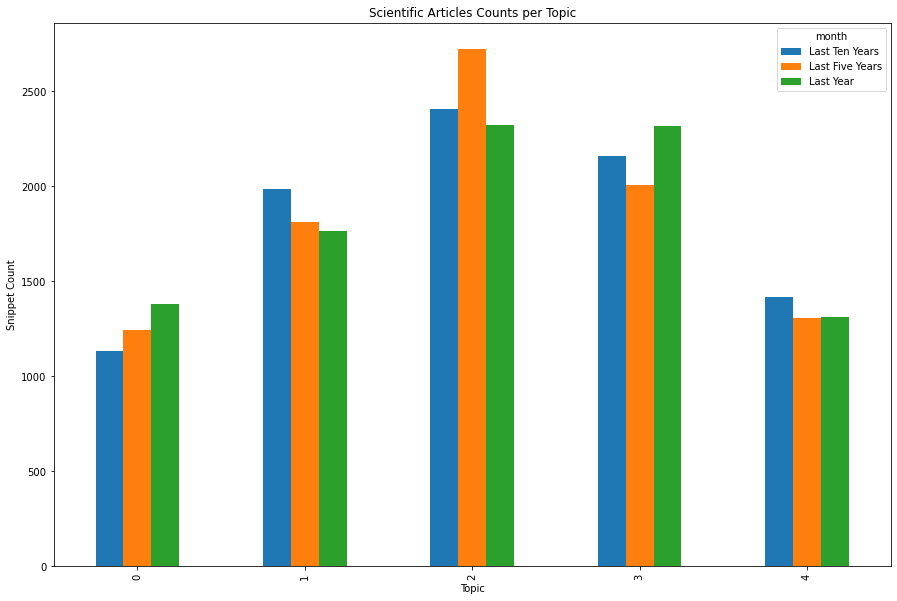

In [276]:
lda(TotalY, 
    Last10Y, Last5Y, LastY, 
    'Last Ten Years', 'Last Five Years', 'Last Year', 
    'Scientific Articles Counts per Topic')


['infection', 'viral', 'cells', 'cell', 'human', 'immune', 'protein', 'cov', 'host', 'binding', 'ace2', 'la']

['clinical', 'respiratory', 'infection', 'cases', '2019', 'cov', 'disease', 'positive', 'symptoms', 'pcr', 'pneumonia', 'ncov']

['countries', 'cases', 'data', 'time', 'rate', 'results', 'disease', 'model', 'number', '95', 'epidemic', 'population']

['risk', 'global', 'healthcare', 'care', 'disease', 'measures', 'social', 'health', 'information', 'public', 'medical', 'world']

['risk', 'severe', 'clinical', 'respiratory', 'infection', 'data', 'evidence', 'review', 'treatment', 'acute', 'disease', 'studies']
month          January  February  March
source_labels                          
0                  174       217    389
1                   54       174    326
2                   23       112    247
3                   38       290    747
4                   19       125    336


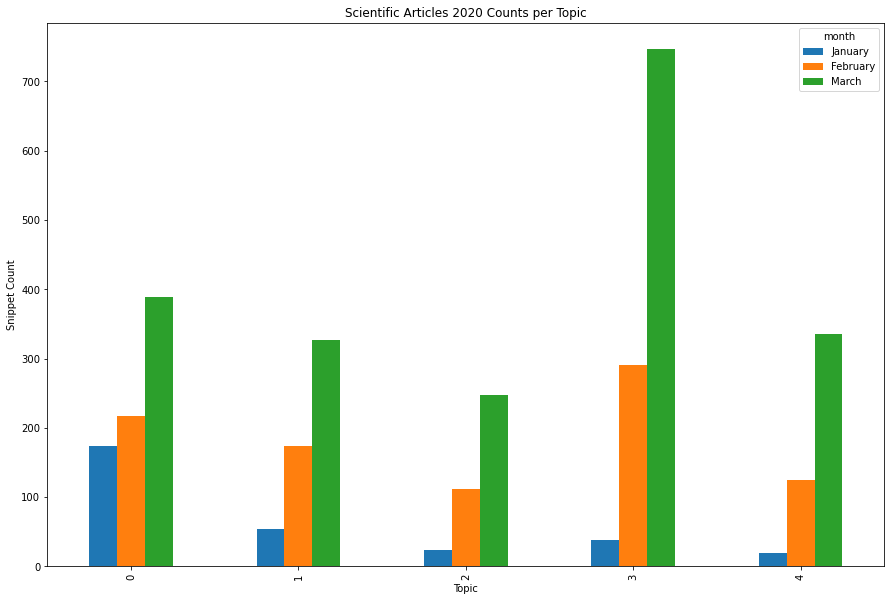

In [277]:
lda(LastYwD, 
    LastYwD_jan, LastYwD_feb, LastYwD_mar, 
    'January', 'February','March', 
    'Scientific Articles 2020 Counts per Topic')

## TV Broadcast LDA

### ABC


['case', 'health', 'cases', 'spreading', 'number', 'deadly', 'second', 'states', 'deaths', 'italy', 'growing', 'flu']

['california', 'passengers', 'infected', 'ship', 'quarantine', 'testing', 'positive', 'americans', 'cruise', 'tested', 'hospital', 'state']

['case', 'positive', 'city', 'know', 'right', 'thank', 'tested', 'david', 'york', 'dr', 'jen', 'ashton']

['public', 'county', 'health', 'cases', 'know', 'president', 'trump', 'bay', 'good', 'white', 'house', 'officials']

['americans', 'south', 'korea', 'fears', 'thank', 'flight', 'president', 'saying', 'warning', 'david', 'cdc', 'authorities']
month          January  February  March
source_labels                          
0                   35       121     51
1                   32       100     58
2                   29        88     71
3                   20        79     61
4                   23        67     56


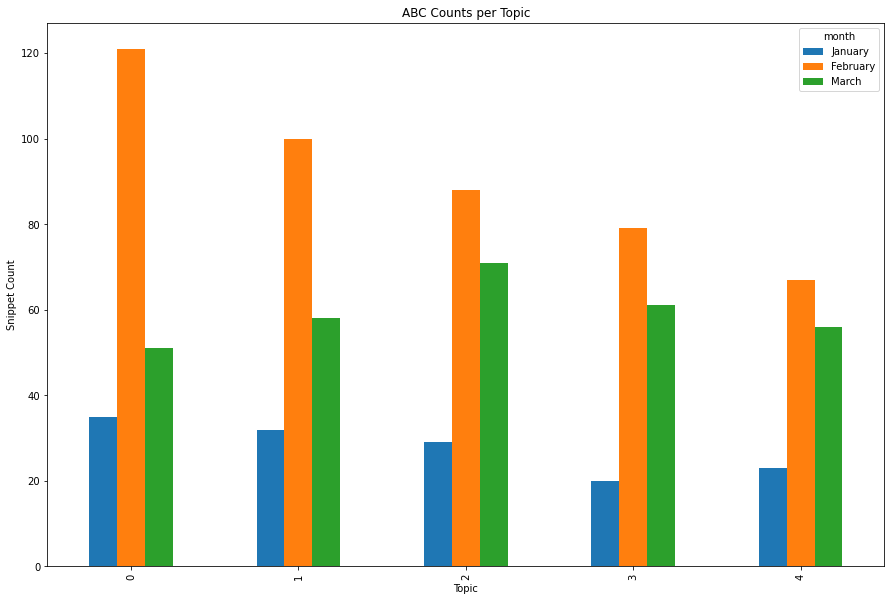

In [198]:
lda(ABC, 
    ABC_jan, ABC_feb, ABC_mar, 
    'January', 'February','March', 
    'ABC Counts per Topic')

## Bloomberg


['cases', 'health', 'officials', 'world', 'case', 'countries', 'saying', 'president', 'trump', 'contain', 'united', 'states']

['cases', 'number', 'toll', 'hong', 'kong', 'deaths', 'let', 'reported', 'japan', 'numbers', 'korea', 'south']

['global', 'demand', 'world', 'thank', 'bloomberg', 'coming', 'impact', 'markets', 'let', 'joining', 'says', 'apple']

['year', 'bloomberg', 'markets', 'companies', 'government', 'hit', 'yield', 'european', '10', 'italy', 'billion', 'support']

['know', 'look', 'global', 'market', 'think', 'impact', 'going', 'growth', 'markets', 'really', 'economy', 'lot']
month          January  February  March
source_labels                          
0                  517      1112    575
1                  344      1427    287
2                  387      1375    591
3                  261       927    485
4                  836      3605   1225


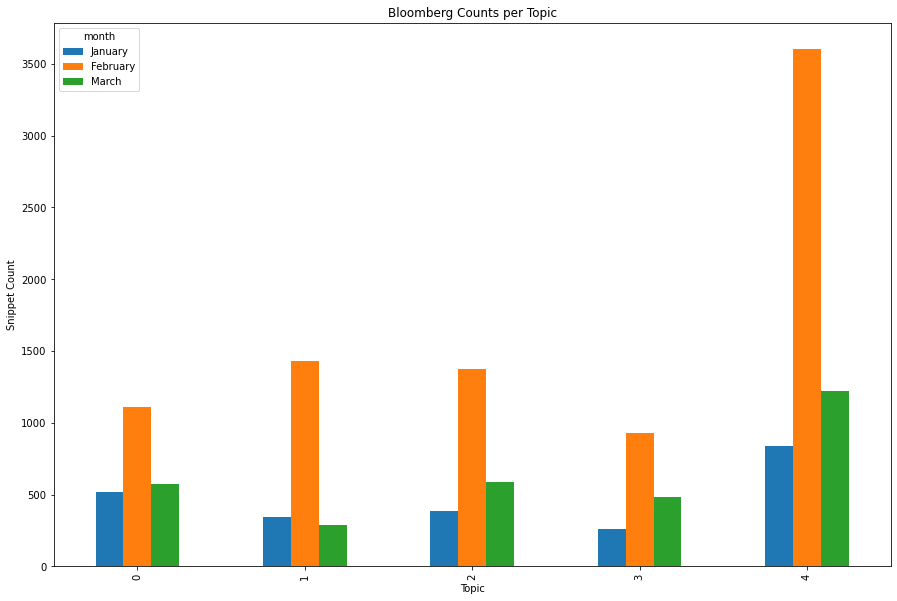

In [155]:
lda(bloom, 
    bloom_jan, bloom_feb, bloom_mar, 
    'January', 'February','March', 
    'Bloomberg Counts per Topic')

### CBS


['way', 'donnell', 'flu', 'right', 'kits', 'thank', 'wall', 'street', 'norah', 'test', 'going', 'need']

['washington', 'hundreds', 'nation', 'deadly', 'donnell', 'good', 'americans', 'begin', 'cbs', 'evening', 'reporting', 'capital']

['states', 'cdc', 'americans', 'cases', 'president', 'trump', 'american', 'says', 'second', 'united', 'white', 'house']

['public', 'health', 'spreading', 'officials', 'wuhan', 'don', 'emergency', 'world', 'organization', 'city', 'market', 'york']

['quarantine', 'tested', 'positive', 'americans', 'number', 'cases', 'infected', 'passengers', 'cruise', 'ship', 'hospital', 'san']
month          January  February  March
source_labels                          
0                   30        40     62
1                   16        31     25
2                   22        36     26
3                   27        51     35
4                   34        76     51


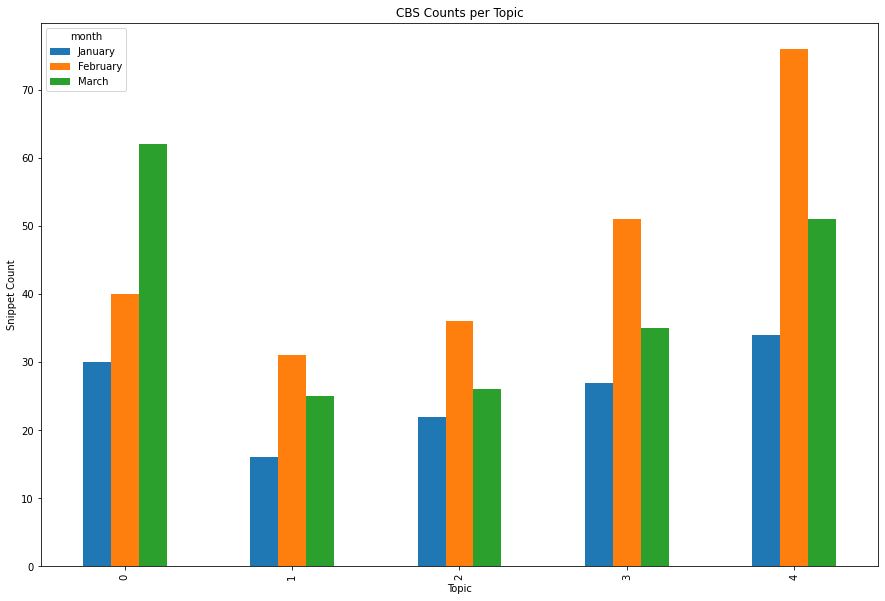

In [207]:
lda(CBS, 
    CBS_jan, CBS_feb, CBS_mar, 
    'January', 'February','March', 
    'CBS Counts per Topic')

### CNBC


['going', 'good', 'lot', 'right', 'work', 'flu', 'impact', 'll', 'president', 'business', 'economy', 'help']

['ve', 'going', 'think', 'know', 'don', 'want', 'lot', 'right', 'market', 'really', 'look', 'things']

['cases', 'case', 'let', 'united', 'states', 'number', 'latest', 'thank', 'president', 'morning', 'numbers', 'italy']

['fears', 'health', 'week', 'global', 'year', 'market', 'world', 'markets', 'stocks', 'oil', 'dow', 'points']

['hit', 'going', 'company', 'stock', 'year', 'impact', 'll', 'companies', 'quarter', 'apple', 'earnings', 'supply']
month          January  February  March
source_labels                          
0                  246       562    351
1                  423      1369    571
2                  253       605    263
3                  344       649    242
4                  305      1039    275


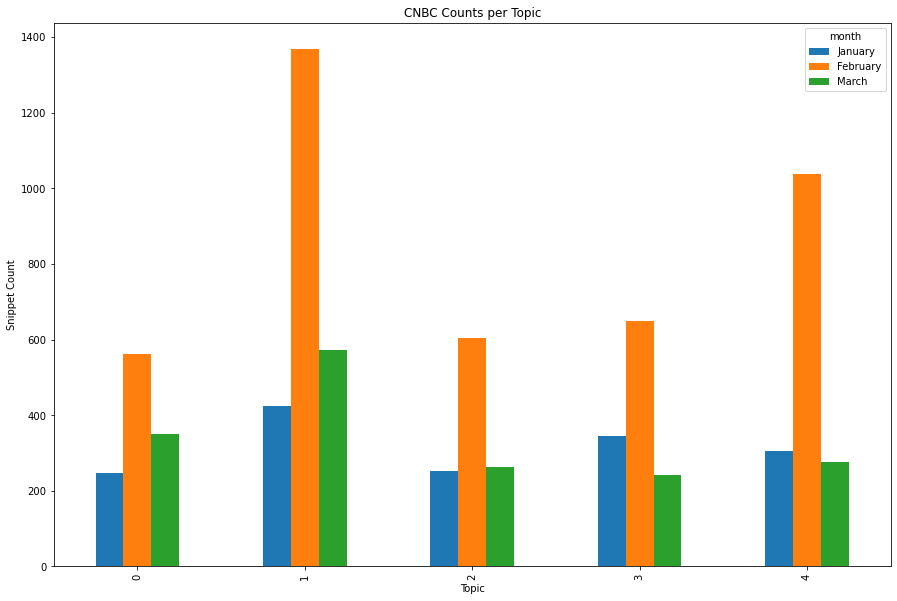

In [156]:
lda(CNBC, 
    CNBC_jan, CNBC_feb, CNBC_mar, 
    'January', 'February','March', 
    'CNBC Counts per Topic')

### CSPAN


['health', 'public', 'officials', 'president', 'response', 'washington', 'house', 'live', 'force', 'federal', 'span', 'org']

['emergency', 'host', 'administration', 'americans', 'think', 'president', 'response', 'billion', 'mr', 'let', 'thank', 'trump']

['health', 'want', 'travel', 'know', 'working', 'work', 'time', 'did', 'come', 'make', 'need', 'sure']

['health', 'public', 'cases', 'know', 'think', 'going', 'number', 'don', 'care', 'information', 'lot', 'community']

['risk', 'know', 'flu', 'american', 'think', 'going', 'cdc', 'test', 'don', 'united', 'states', 'vaccine']
month          January  February  March
source_labels                          
0                    8       315    753
1                   22       421    738
2                   16       336    729
3                   13       424   1091
4                   16       416    947


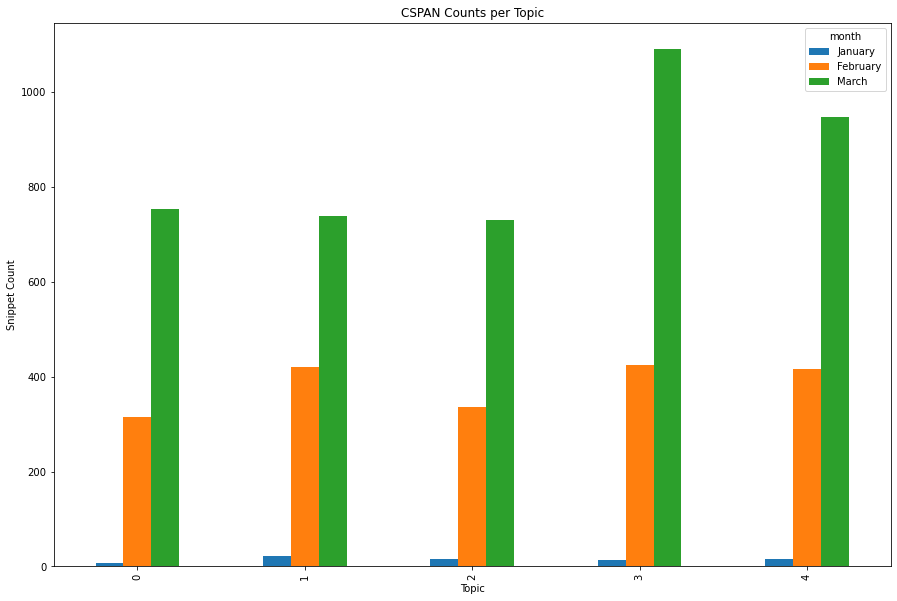

In [159]:
lda(CSPAN, 
    CSPAN_jan, CSPAN_feb, CSPAN_mar, 
    'January', 'February','March', 
    'CSPAN Counts per Topic')

### DW


['lot', 'health', 'don', 'know', 'world', 'actually', 'going', 've', 'really', 'right', 'think', 'time']

['cases', 'government', 'passengers', 'japan', 'symptoms', 'quarantine', 'weeks', 'tested', 'positive', 'board', 'ship', 'cruise']

['global', 'cases', '1st', 'world', 'impact', 'germany', 'markets', 'fears', 'percent', 'economy', 'business', 'economic']

['health', 'emergency', 'cases', 'countries', 'infections', '1st', 'world', 'organization', 'measures', 'number', 'contain', 'italy']

['year', 'cases', '1st', 'infected', 'city', 'say', 'coming', 'authorities', 'president', 'hospital', 'hong', 'kong']
month          January  February  March
source_labels                          
0                  953       964    670
1                  246       869    454
2                  678       873    953
3                  769      1158   1055
4                  847      1136    397


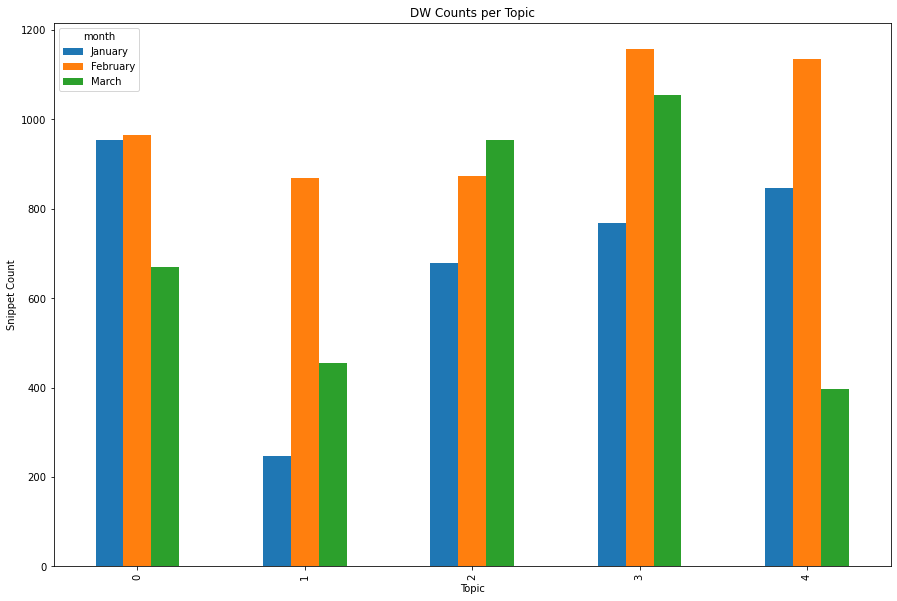

In [160]:
lda(DW, 
    DW_jan, DW_feb, DW_mar, 
    'January', 'February','March', 
    'DW Counts per Topic')

### FBC


['health', 'public', 'officials', 'president', 'response', 'washington', 'house', 'live', 'force', 'federal', 'span', 'org']

['emergency', 'host', 'administration', 'americans', 'think', 'president', 'response', 'billion', 'mr', 'let', 'thank', 'trump']

['health', 'want', 'travel', 'know', 'working', 'work', 'time', 'did', 'come', 'make', 'need', 'sure']

['health', 'public', 'cases', 'know', 'think', 'going', 'number', 'don', 'care', 'information', 'lot', 'community']

['risk', 'know', 'flu', 'american', 'think', 'going', 'cdc', 'test', 'don', 'united', 'states', 'vaccine']
month          January  February  March
source_labels                          
0                    8       315    753
1                   22       421    738
2                   16       336    729
3                   13       424   1091
4                   16       416    947


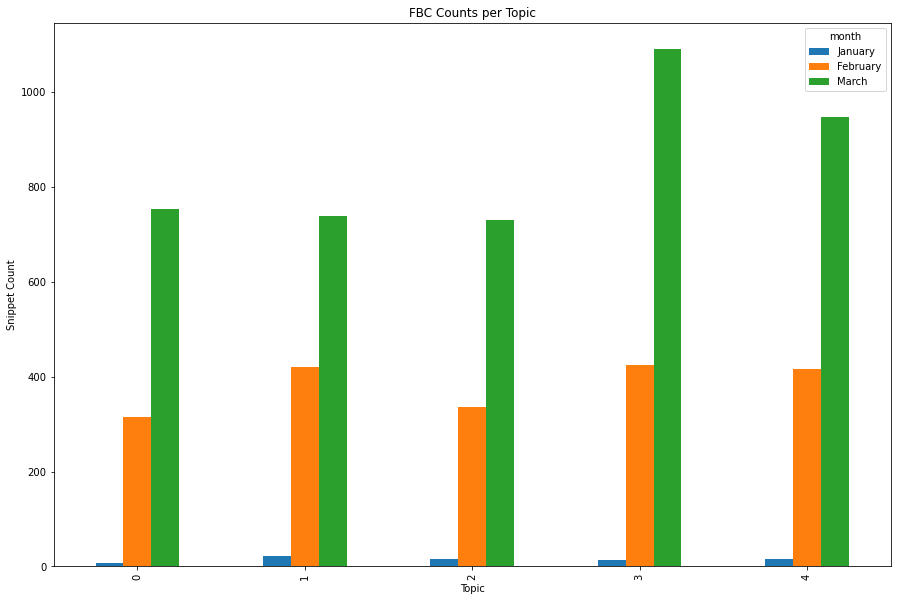

In [161]:
lda(FBC, 
    FBC_jan, FBC_feb, FBC_mar, 
    'January', 'February','March', 
    'FBC Counts per Topic')

### NBC


['says', 'need', 'richard', 'engel', 'flu', 'know', 'don', 'cases', 'cdc', 'president', 'nbc', 'trump']

['washington', 'health', 'person', 'united', 'states', 'cases', 'cdc', 'emergency', 'growing', 'face', 'state', 'potential']

['spreading', 'air', 'medical', 'symptoms', 'flight', 'nbc', 'miguel', 'tom', 'costello', 'travel', 'base', 'international']

['health', 'lester', 'world', 'evening', 'impact', 'cases', 'organization', 'president', 'nbc', 'good', 'house', 'thank']

['right', 'cruise', 'passengers', 'cases', 'bay', 'area', 'ship', 'tested', 'americans', 'officials', 'quarantine', 'positive']
month          January  February  March
source_labels                          
0                   45        70     85
1                   33        62     75
2                   21        63     44
3                   24        90     63
4                   36        82     90


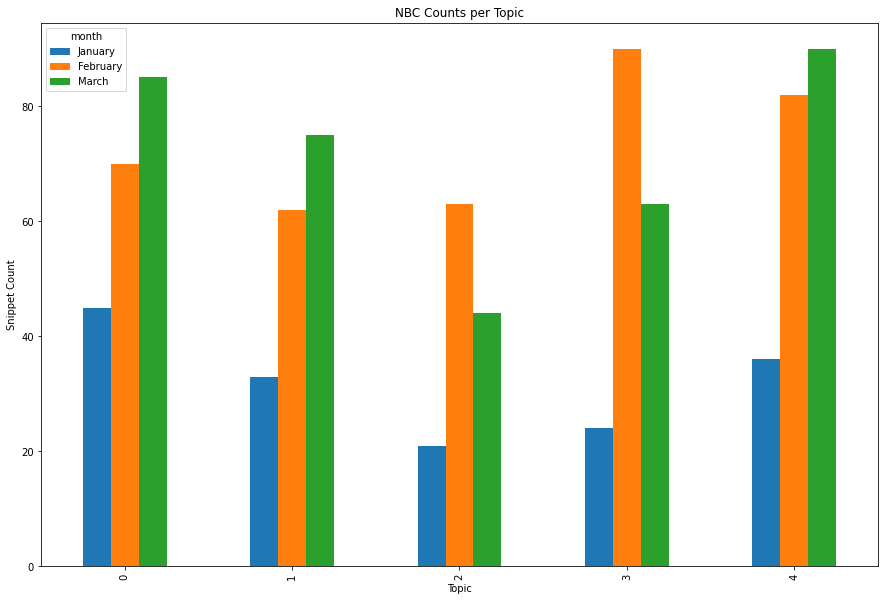

In [208]:
lda(NBC, 
    NBC_jan, NBC_feb, NBC_mar, 
    'January', 'February','March', 
    'NBC Counts per Topic')

### Al Jazeera


['1st', 'cases', 'world', 'number', 'president', 'reported', 'south', 'korea', 'outside', 'infections', 'trump', 'italy']

['actually', 'government', 'time', 'say', 'don', 'right', 'going', 'know', 'think', 'lot', 'really', 've']

['beijing', 'government', '1st', 'cases', 'world', 'travel', 'restrictions', 'year', 'city', 'contain', 'measures', 'coming']

['government', '1st', 'cases', 'says', 'number', 'hong', 'kong', 'president', 'tested', 'passengers', 'cruise', 'ship']

['cases', 'health', 'says', 'world', 'organization', 'infected', 'number', 'public', 'emergency', 'iran', 'countries', 'global']
month          January  February  March
source_labels                          
0                  254       805   1414
1                 1212      1115    860
2                  866       805    739
3                  704      1296    676
4                  669       979   1006


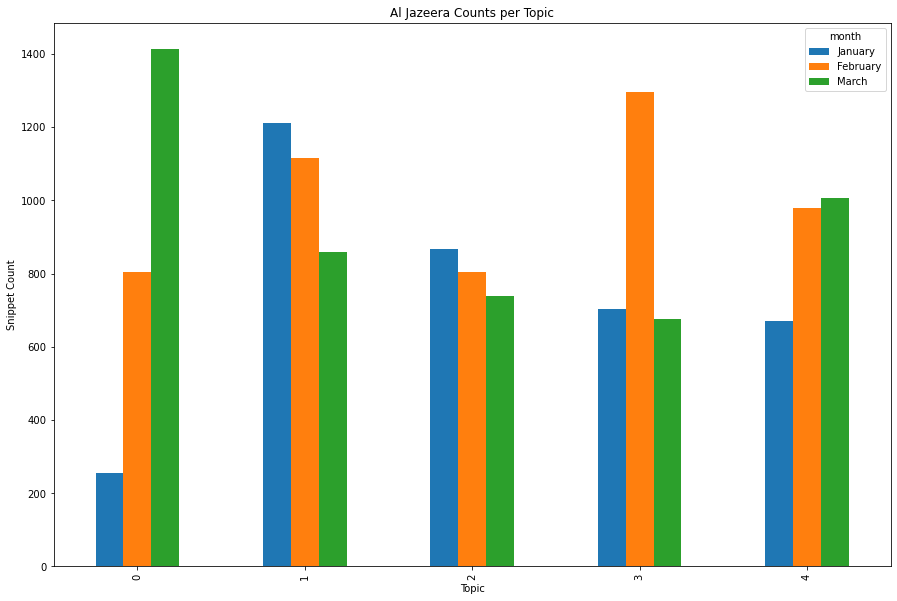

In [13]:
lda(aljaz, 
    aljaz_jan, aljaz_feb, aljaz_mar, 
    'January', 'February','March', 
    'Al Jazeera Counts per Topic')

### BBC


['know', 'don', 'symptoms', 'risk', 'infected', 'lot', 'going', 'think', 'time', 'need', 'things', 'really']

['wuhan', 'world', 'health', 'organization', 'uk', 'public', 'cases', 'emergency', 'number', 'says', 'contain', 'government']

['world', 'global', 'impact', 'let', 'united', 'president', 'trump', 'fears', 'business', 'markets', 'economic', 'economy']

['authorities', 'wuhan', 'cases', 'quarantine', 'kong', 'passengers', 'board', 'cruise', 'ship', 'million', 'tested', 'princess']

['health', 'uk', 'british', 'cases', 'number', 'says', 'total', 'positive', 'hospital', 'tested', 'italy', 'england']
month          January  February  March
source_labels                          
0                 1370      1355   1679
1                  866       689    749
2                  553       957   1110
3                  639       901    544
4                  514      1098    918


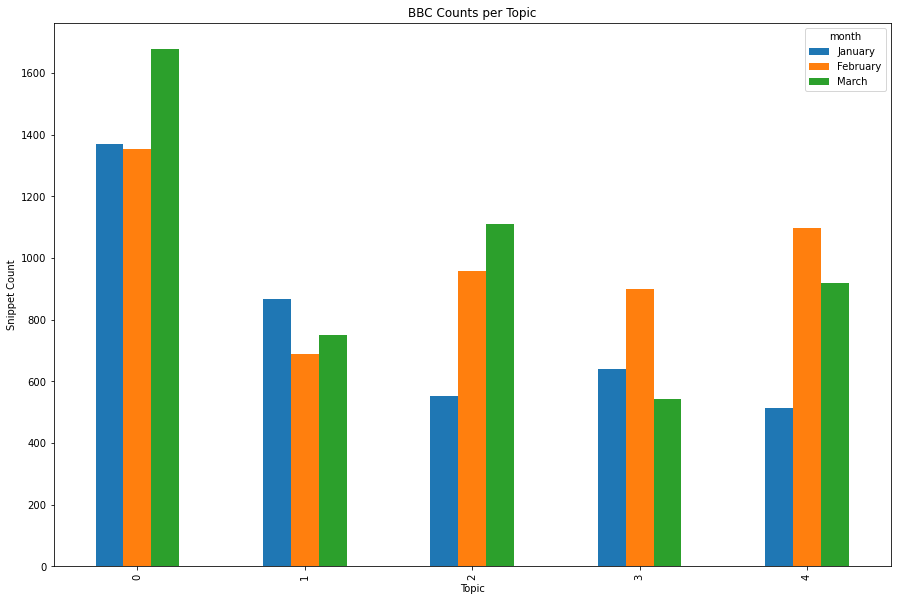

In [14]:
lda(bbc, 
    bbc_jan, bbc_feb, bbc_mar, 
    'January', 'February','March', 
    'BBC Counts per Topic')

### Reuters


['know', 'international', 'world', 'health', 'organization', 'public', 'did', '1st', 'make', 'year', 'time', 'flu']

['right', 'know', 'world', 'markets', 'let', 'mean', 'look', 'going', 'really', 'think', 've', 'money']

['fear', 'world', 'number', 'cases', 'authorities', 'russia', 'border', '1st', 'situation', 'russian', 'quarantine', 'italy']

['percent', 'state', 'know', 'health', 'global', 'fears', 'markets', 'case', 'week', 'going', 'think', 'year']

['economy', 'things', 'russia', 'oil', 'way', 'going', 'don', 'think', 'want', 'hope', 'thing', 'information']
month          January  February  March
source_labels                          
0                  268       743    396
1                  157       920    520
2                  332       840    447
3                  239       887    519
4                   80       639    547


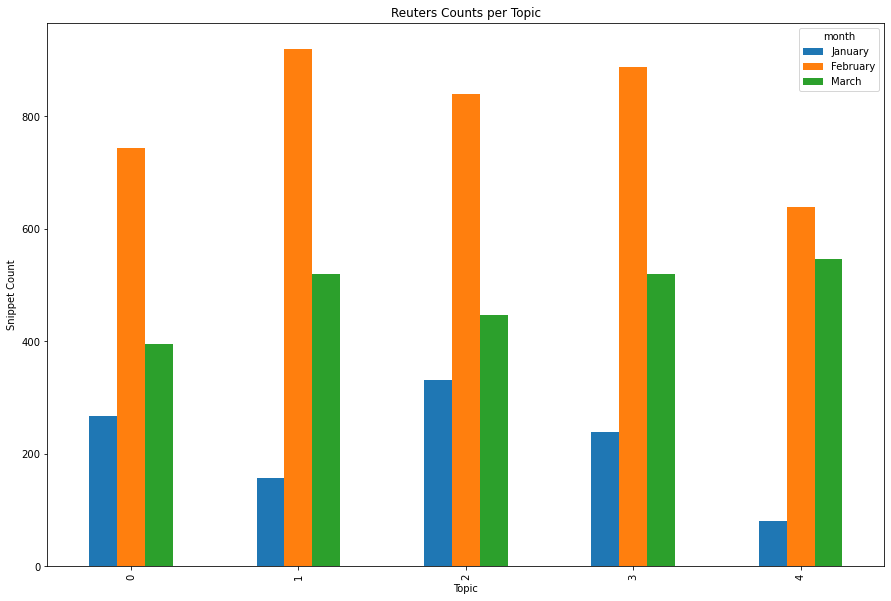

In [15]:
lda(rt, 
    rt_jan, rt_feb, rt_mar, 
    'January', 'February', 'March',
    'Reuters Counts per Topic')

### Fox News


['case', 'states', 'health', 'cases', 'know', 'flu', 'going', 'deaths', 'right', 'united', 'state', 'number']

['morning', 'global', 'world', 'cases', 'trump', 'fears', 'ed', 'markets', 'president', 'market', 'sandra', 'thank']

['quarantined', 'americans', 'tested', 'president', 'california', 'passengers', 'cruise', 'quarantine', 'japan', 'ship', 'positive', 'princess']

['white', 'house', 'don', 'know', 'think', 'going', 'vaccine', 'right', 'trump', 'want', 'president', 'lot']

['did', 'health', 'don', 'know', 'going', 'medical', 'trump', 'risk', 'president', 'public', 'need', 'democrats']
month          January  February  March
source_labels                          
0                  324       962    922
1                  201       833    733
2                   74       714    496
3                  138       901   1011
4                  197      1014    997


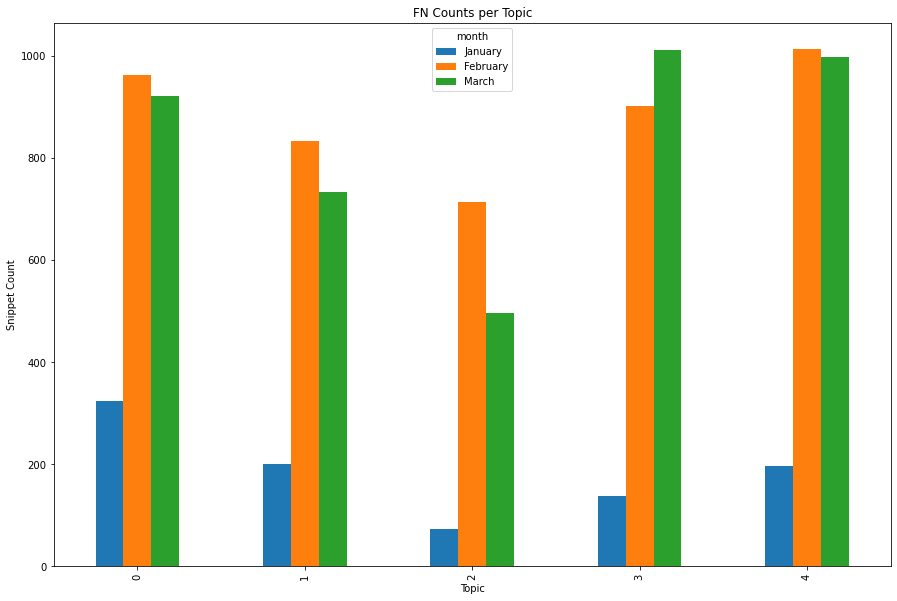

In [16]:
lda(FN, 
    FN_jan, FN_feb, FN_mar, 
    'January', 'February','March', 
    'FN Counts per Topic')

### MSNBC


['case', 'states', 'health', 'cases', 'know', 'flu', 'going', 'deaths', 'right', 'united', 'state', 'number']

['morning', 'global', 'world', 'cases', 'trump', 'fears', 'ed', 'markets', 'president', 'market', 'sandra', 'thank']

['quarantined', 'americans', 'tested', 'president', 'california', 'passengers', 'cruise', 'quarantine', 'japan', 'ship', 'positive', 'princess']

['white', 'house', 'don', 'know', 'think', 'going', 'vaccine', 'right', 'trump', 'want', 'president', 'lot']

['did', 'health', 'don', 'know', 'going', 'medical', 'trump', 'risk', 'president', 'public', 'need', 'democrats']
month          January  February  March
source_labels                          
0                  324       962    922
1                  201       833    733
2                   74       714    496
3                  138       901   1011
4                  197      1014    997


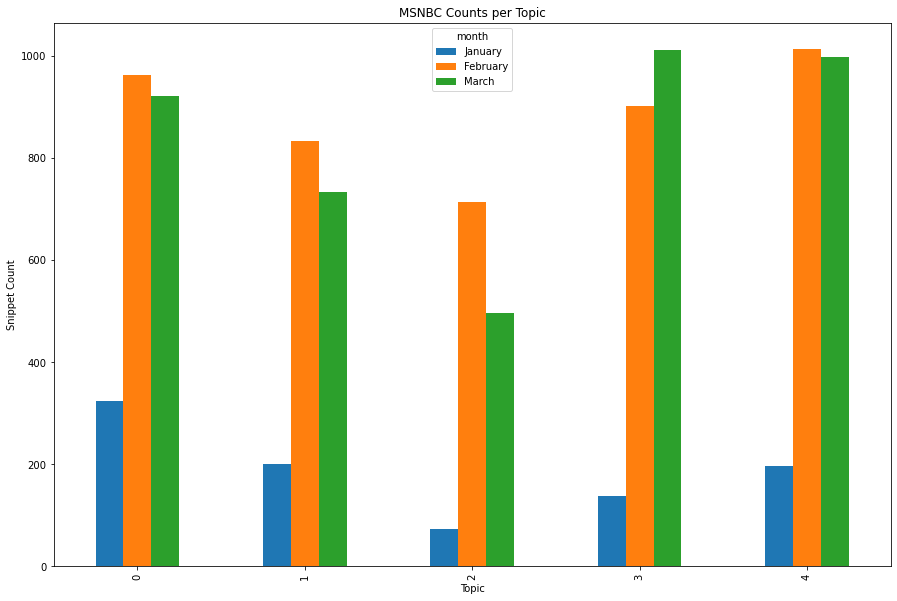

In [17]:
lda(MSNBC, 
    MSNBC_jan, MSNBC_feb, MSNBC_mar, 
    'January', 'February','March', 
    'MSNBC Counts per Topic')

### CNN


['case', 'states', 'health', 'cases', 'know', 'flu', 'going', 'deaths', 'right', 'united', 'state', 'number']

['morning', 'global', 'world', 'cases', 'trump', 'fears', 'ed', 'markets', 'president', 'market', 'sandra', 'thank']

['quarantined', 'americans', 'tested', 'president', 'california', 'passengers', 'cruise', 'quarantine', 'japan', 'ship', 'positive', 'princess']

['white', 'house', 'don', 'know', 'think', 'going', 'vaccine', 'right', 'trump', 'want', 'president', 'lot']

['did', 'health', 'don', 'know', 'going', 'medical', 'trump', 'risk', 'president', 'public', 'need', 'democrats']
month          January  February  March
source_labels                          
0                  324       962    922
1                  201       833    733
2                   74       714    496
3                  138       901   1011
4                  197      1014    997


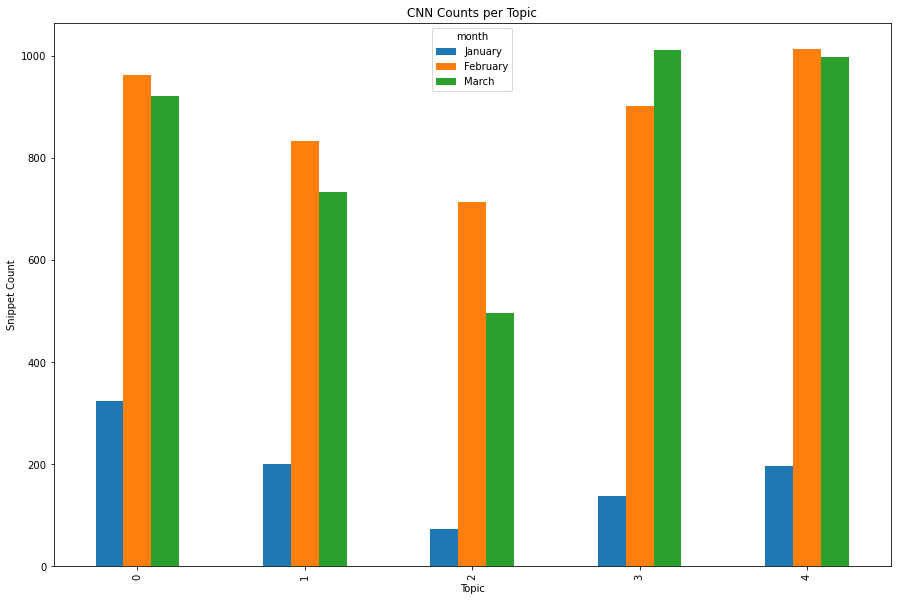

In [18]:
lda(CNN, 
    CNN_jan, CNN_feb, CNN_mar, 
    'January', 'February','March', 
    'CNN Counts per Topic')

## Twitter LDA


['hospital', 'wuhan', 'time', 'fight', 'amp', 'response', 've', 'really', 'medical', 'old', 'states', 'let']

['says', 'japan', 'twitter', 'pic', 'cruise', 'ship', 'positive', 'trump', 'negative', 'tested', 'test', 'president']

['free', 'amp', 'world', 'uk', 'global', 'bit', 'ly', 'quarantine', 'health', 'public', 'reut', 'rs']

['wuhan', 'time', 'care', 'flu', 'amp', 'number', 'deaths', 'reports', 'cases', 'health', 'iran', 'reported']

['need', 'amp', 'help', 'watch', 'make', 'apple', 'don', 'know', 'trump', 'workers', 'support', 'way']
month          February  March  April
source_labels                        
0                   446    525    726
1                   424    492    397
2                   523    451    484
3                   575    434    382
4                   532    598    511


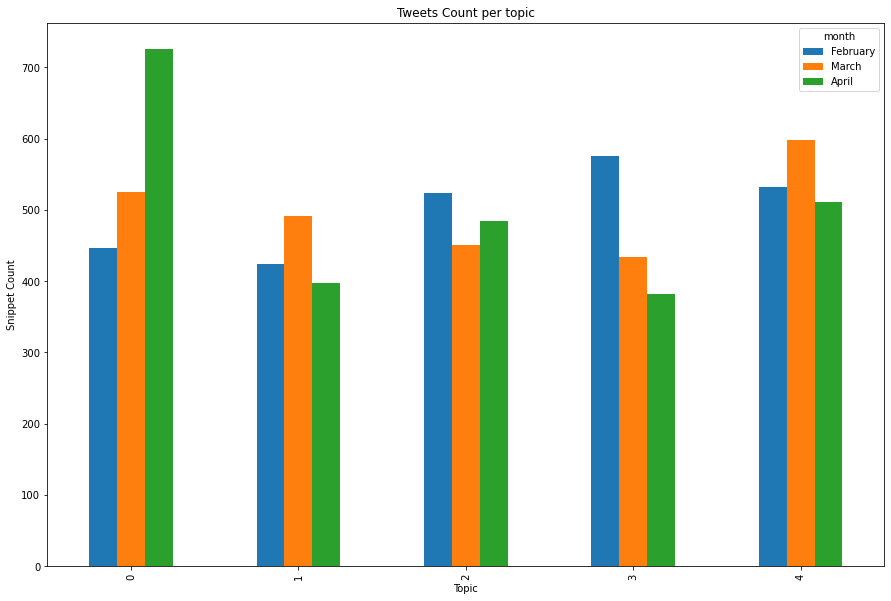

In [19]:
lda(tweets,
    feb_tweets, march_tweets, april_tweets,
    "February", "March", "April",
    "Tweets Count per topic")

# Sentiment Analysis

In [83]:
# import vader sentiment analysis module and word tokenizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk import sentiment
from nltk import word_tokenize
import nltk
nltk.download('vader_lexicon')
nltk.download('punkt')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/evekazarian/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/evekazarian/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [84]:
#initialize vader module
sid = SentimentIntensityAnalyzer()

In [85]:
# splits text into sentences/words
tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')

In [86]:
# print sentiment distribution for entire snippet collection 
def sentimentDistributionCalc(tokenizedSnippets):
    posNum = 0
    negNum = 0
    neuNum = 0 
    for snippet in tokenizedSnippets:
        scores = sid.polarity_scores(snippet)
        for key in sorted(scores):
            if (scores['pos']>scores['neg'] and scores['pos']>scores['neu']):
                posNum += 1
                print("POSITIVE:", snippet)
            elif (scores['neu']>scores['neg'] and scores['neu']>scores['pos']):
                neuNum += 1
            elif (scores['neg']>scores['neu'] and scores['neg']>scores['pos']):
                negNum += 1      
                print("NEGATIVE:", snippet)

    
    total = posNum+negNum+neuNum

    print("Percentage positive:", (posNum/total)*100)
    print("Percentage negative:", (negNum/total)*100)
    print("Percentage neutral:", (neuNum/total)*100)
    if(negNum!=0 and posNum!=0):
        print("negative:positive ratio", negNum/posNum)

In [101]:
# print sentiment distribution for entire snippet collection 
def makePie(tokenizedSnippets):
    posNum = 0
    negNum = 0
    neuNum = 0 
    for snippet in tokenizedSnippets:
        scores = sid.polarity_scores(snippet)
        
        for key in sorted(scores):
            if (scores['pos']>scores['neg'] and scores['pos']>scores['neu']):
                posNum += 1
            elif (scores['neu']>scores['neg'] and scores['neu']>scores['pos']):
                neuNum += 1
            elif (scores['neg']>scores['neu'] and scores['neg']>scores['pos']):
                negNum += 1
    
    df = pd.DataFrame(
        {'sentiment': ['Positive', 'Negative', 'Neutral'],
       'count': [posNum, negNum, neuNum]},
        index=['Positive', 'Negative','Neutral']
        )
    
    plot = df.plot.pie(y='count', figsize=(6, 6))
    
    if(negNum!=0 and posNum!=0):
        df2 = pd.DataFrame(
            {'sentiment': ['Positive', 'Negative'],
           'count': [posNum, negNum]}, 
            index=['Positive', 'Negative']
            )

        plot = df2.plot.pie(y='count', figsize=(4, 4))

## TV Broadcast Sentiment Analysis

### BBC

In [88]:
# generating list of all broadcast snippets
bbcSnippets = []
for e in bbc[bbc.columns[0]]: 
    bbcSnippets.append(e)

In [89]:
# tokenize the entire body of broadcast snippets
bbcSnippetsTokenized = tokenizer.tokenize(''.join(bbcSnippets))

In [90]:
sentimentDistributionCalc(bbcSnippetsTokenized)

NEGATIVE: _and breathing difficulties.
NEGATIVE: _and breathing difficulties.
NEGATIVE: _and breathing difficulties.
NEGATIVE: _and breathing difficulties.
NEGATIVE: that killed more thanmore preparedness.
NEGATIVE: that killed more thanmore preparedness.
NEGATIVE: that killed more thanmore preparedness.
NEGATIVE: that killed more thanmore preparedness.
NEGATIVE: is the killer virus here?
NEGATIVE: is the killer virus here?
NEGATIVE: is the killer virus here?
NEGATIVE: is the killer virus here?
POSITIVE: yes, good evening.
POSITIVE: yes, good evening.
POSITIVE: yes, good evening.
POSITIVE: yes, good evening.
POSITIVE: lovely to see you.
POSITIVE: lovely to see you.
POSITIVE: lovely to see you.
POSITIVE: lovely to see you.
NEGATIVE: -- five suspects.
NEGATIVE: -- five suspects.
NEGATIVE: -- five suspects.
NEGATIVE: -- five suspects.
POSITIVE: thanks.
POSITIVE: thanks.
POSITIVE: thanks.
POSITIVE: thanks.
POSITIVE: a boost for hs2.
POSITIVE: a boost for hs2.
POSITIVE: a boost for hs2.
POS

POSITIVE: thank you.
POSITIVE: thank you.
POSITIVE: thank you.
POSITIVE: thank you.
NEGATIVE: 0f infected.
NEGATIVE: 0f infected.
NEGATIVE: 0f infected.
NEGATIVE: 0f infected.
POSITIVE: goggles as well.
POSITIVE: goggles as well.
POSITIVE: goggles as well.
POSITIVE: goggles as well.
POSITIVE: yes.
POSITIVE: yes.
POSITIVE: yes.
POSITIVE: yes.
POSITIVE: goggles as well.
POSITIVE: goggles as well.
POSITIVE: goggles as well.
POSITIVE: goggles as well.
POSITIVE: goggles as well.
POSITIVE: goggles as well.
POSITIVE: goggles as well.
POSITIVE: goggles as well.
POSITIVE: rich preston reports.
POSITIVE: rich preston reports.
POSITIVE: rich preston reports.
POSITIVE: rich preston reports.
POSITIVE: good morning.
POSITIVE: good morning.
POSITIVE: good morning.
POSITIVE: good morning.
POSITIVE: good morning.
POSITIVE: good morning.
POSITIVE: good morning.
POSITIVE: good morning.
POSITIVE: thank you.
POSITIVE: thank you.
POSITIVE: thank you.
POSITIVE: thank you.
POSITIVE: lovely to see you.
POSITIV

POSITIVE: good morning, asia.
POSITIVE: good morning, asia.
POSITIVE: good morning, asia.
POSITIVE: good morning, asia.
NEGATIVE: risk of being infected.
NEGATIVE: risk of being infected.
NEGATIVE: risk of being infected.
NEGATIVE: risk of being infected.
POSITIVE: thank you.
POSITIVE: thank you.
POSITIVE: thank you.
POSITIVE: thank you.
POSITIVE: we appreciate that.
POSITIVE: we appreciate that.
POSITIVE: we appreciate that.
POSITIVE: we appreciate that.
POSITIVE: well, all!
POSITIVE: well, all!
POSITIVE: well, all!
POSITIVE: well, all!
POSITIVE: judi dench, shakespeare in love.
POSITIVE: judi dench, shakespeare in love.
POSITIVE: judi dench, shakespeare in love.
POSITIVE: judi dench, shakespeare in love.
POSITIVE: thank you.
POSITIVE: thank you.
POSITIVE: thank you.
POSITIVE: thank you.
POSITIVE: thank you.
POSITIVE: thank you.
POSITIVE: thank you.
POSITIVE: thank you.
POSITIVE: oh, yeah.
POSITIVE: oh, yeah.
POSITIVE: oh, yeah.
POSITIVE: oh, yeah.
POSITIVE: yes.
POSITIVE: yes.
POSITI

NEGATIVE: no, the misinformation is worse.
NEGATIVE: no, the misinformation is worse.
NEGATIVE: no, the misinformation is worse.
NEGATIVE: no, the misinformation is worse.
NEGATIVE: no, no.
NEGATIVE: no, no.
NEGATIVE: no, no.
NEGATIVE: no, no.
NEGATIVE: the headline is killer virus, crisis and have a line-up lockdown.
NEGATIVE: the headline is killer virus, crisis and have a line-up lockdown.
NEGATIVE: the headline is killer virus, crisis and have a line-up lockdown.
NEGATIVE: the headline is killer virus, crisis and have a line-up lockdown.
POSITIVE: yeah, xijinping first.
POSITIVE: yeah, xijinping first.
POSITIVE: yeah, xijinping first.
POSITIVE: yeah, xijinping first.
POSITIVE: yeah, it does.
POSITIVE: yeah, it does.
POSITIVE: yeah, it does.
POSITIVE: yeah, it does.
POSITIVE: that's positive.
POSITIVE: that's positive.
POSITIVE: that's positive.
POSITIVE: that's positive.
POSITIVE: yes.
POSITIVE: yes.
POSITIVE: yes.
POSITIVE: yes.
NEGATIVE: his warnings were ignored.
NEGATIVE: his w

POSITIVE: to expand surveillance.
POSITIVE: to expand surveillance.
POSITIVE: to expand surveillance.
POSITIVE: to expand surveillance.
POSITIVE: i think maximising workforce likes ability is key.worse.
POSITIVE: i think maximising workforce likes ability is key.worse.
POSITIVE: i think maximising workforce likes ability is key.worse.
POSITIVE: i think maximising workforce likes ability is key.worse.
NEGATIVE: worse.
NEGATIVE: worse.
NEGATIVE: worse.
NEGATIVE: worse.
POSITIVE: 16 were positive.
POSITIVE: 16 were positive.
POSITIVE: 16 were positive.
POSITIVE: 16 were positive.
NEGATIVE: thank you.several crisis centres.
NEGATIVE: thank you.several crisis centres.
NEGATIVE: thank you.several crisis centres.
NEGATIVE: thank you.several crisis centres.
POSITIVE: yes, that's right.
POSITIVE: yes, that's right.
POSITIVE: yes, that's right.
POSITIVE: yes, that's right.
NEGATIVE: translation: we do not want to create panic.
NEGATIVE: translation: we do not want to create panic.
NEGATIVE: tran

POSITIVE: 0k, ok, dominic hughes, thank you.
POSITIVE: 0k, ok, dominic hughes, thank you.
POSITIVE: 0k, ok, dominic hughes, thank you.
POSITIVE: 0k, ok, dominic hughes, thank you.
NEGATIVE: no longer.
NEGATIVE: no longer.
NEGATIVE: no longer.
NEGATIVE: no longer.
NEGATIVE: angry protests on thewarwick.
NEGATIVE: angry protests on thewarwick.
NEGATIVE: angry protests on thewarwick.
NEGATIVE: angry protests on thewarwick.
POSITIVE: welcome, thank you forjoining us.
POSITIVE: welcome, thank you forjoining us.
POSITIVE: welcome, thank you forjoining us.
POSITIVE: welcome, thank you forjoining us.
POSITIVE: good morning.
POSITIVE: good morning.
POSITIVE: good morning.
POSITIVE: good morning.
POSITIVE: many thanks.
POSITIVE: many thanks.
POSITIVE: many thanks.
POSITIVE: many thanks.
NEGATIVE: the worst affected region is lombardy.
NEGATIVE: the worst affected region is lombardy.
NEGATIVE: the worst affected region is lombardy.
NEGATIVE: the worst affected region is lombardy.
POSITIVE: 0n the

POSITIVE: yes.
POSITIVE: yes.
POSITIVE: yes.
POSITIVE: yes.
NEGATIVE: even funerals are now banned, replaced with a restricted blessing.
NEGATIVE: even funerals are now banned, replaced with a restricted blessing.
NEGATIVE: even funerals are now banned, replaced with a restricted blessing.
NEGATIVE: even funerals are now banned, replaced with a restricted blessing.
POSITIVE: the# happy birthday to you, happy birthday to you.
POSITIVE: the# happy birthday to you, happy birthday to you.
POSITIVE: the# happy birthday to you, happy birthday to you.
POSITIVE: the# happy birthday to you, happy birthday to you.
POSITIVE: thanks.
POSITIVE: thanks.
POSITIVE: thanks.
POSITIVE: thanks.
POSITIVE: byweekend, take care.
POSITIVE: byweekend, take care.
POSITIVE: byweekend, take care.
POSITIVE: byweekend, take care.
POSITIVE: a very warm welcome to bbc news.
POSITIVE: a very warm welcome to bbc news.
POSITIVE: a very warm welcome to bbc news.
POSITIVE: a very warm welcome to bbc news.
POSITIVE: thank 

POSITIVE: a fantastic nhs.
POSITIVE: a fantastic nhs.
POSITIVE: a fantastic nhs.
POSITIVE: a fantastic nhs.
POSITIVE: good question.
POSITIVE: good question.
POSITIVE: good question.
POSITIVE: good question.
POSITIVE: -- major support.
POSITIVE: -- major support.
POSITIVE: -- major support.
POSITIVE: -- major support.
NEGATIVE: seasonal flu perspective.
NEGATIVE: seasonal flu perspective.
NEGATIVE: seasonal flu perspective.
NEGATIVE: seasonal flu perspective.
POSITIVE: important context.
POSITIVE: important context.
POSITIVE: important context.
POSITIVE: important context.
POSITIVE: thank you both for your reassuring words.
POSITIVE: thank you both for your reassuring words.
POSITIVE: thank you both for your reassuring words.
POSITIVE: thank you both for your reassuring words.
POSITIVE: well done.
POSITIVE: well done.
POSITIVE: well done.
POSITIVE: well done.
NEGATIVE: empty.
NEGATIVE: empty.
NEGATIVE: empty.
NEGATIVE: empty.
POSITIVE: good afternoon.
POSITIVE: good afternoon.
POSITIVE

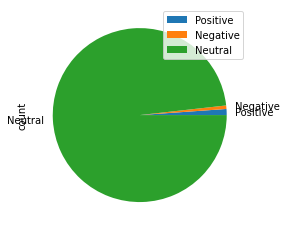

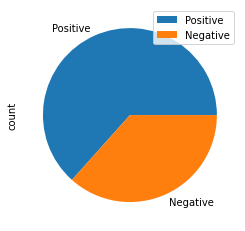

In [91]:
makePie(bbcSnippetsTokenized)

### Al Jazeera

In [92]:
aljazSnippets = []
for e in aljaz[aljaz.columns[0]]: 
    aljazSnippets.append(e)

aljazeeraSnippetsTokenized = tokenizer.tokenize(''.join(aljazSnippets))

sentimentDistributionCalc(aljazeeraSnippetsTokenized)

NEGATIVE: fear of.
NEGATIVE: fear of.
NEGATIVE: fear of.
NEGATIVE: fear of.
NEGATIVE: refugee crisis.
NEGATIVE: refugee crisis.
NEGATIVE: refugee crisis.
NEGATIVE: refugee crisis.
POSITIVE: just make sure.
POSITIVE: just make sure.
POSITIVE: just make sure.
POSITIVE: just make sure.
NEGATIVE: brazil's worst industrial disaster almost a year ago.
NEGATIVE: brazil's worst industrial disaster almost a year ago.
NEGATIVE: brazil's worst industrial disaster almost a year ago.
NEGATIVE: brazil's worst industrial disaster almost a year ago.
NEGATIVE: war.
NEGATIVE: war.
NEGATIVE: war.
NEGATIVE: war.
POSITIVE: parts of the great wallnew year holiday.
POSITIVE: parts of the great wallnew year holiday.
POSITIVE: parts of the great wallnew year holiday.
POSITIVE: parts of the great wallnew year holiday.
POSITIVE: just make sure.
POSITIVE: just make sure.
POSITIVE: just make sure.
POSITIVE: just make sure.
POSITIVE: throughout the day safe and saved.
POSITIVE: throughout the day safe and saved.
PO

Percentage positive: 0.4876170922622867
Percentage negative: 0.2694726036186321
Percentage neutral: 99.24291030411908
negative:positive ratio 0.5526315789473685


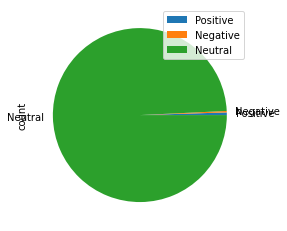

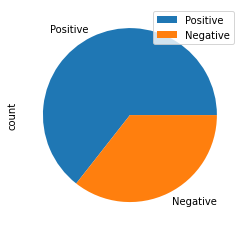

In [93]:
makePie(aljazeeraSnippetsTokenized)

### Reuters

In [94]:
rtSnippets = []
for e in rt[rt.columns[0]]: 
    rtSnippets.append(e)

rtSnippetsTokenized = tokenizer.tokenize(''.join(rtSnippets))

sentimentDistributionCalc(rtSnippetsTokenized)

NEGATIVE: when it disgustingly ironic thatchina.
NEGATIVE: when it disgustingly ironic thatchina.
NEGATIVE: when it disgustingly ironic thatchina.
NEGATIVE: when it disgustingly ironic thatchina.
NEGATIVE: when it disgustingly ironic thatmade in china.
NEGATIVE: when it disgustingly ironic thatmade in china.
NEGATIVE: when it disgustingly ironic thatmade in china.
NEGATIVE: when it disgustingly ironic thatmade in china.
NEGATIVE: contradictory were things.
NEGATIVE: contradictory were things.
NEGATIVE: contradictory were things.
NEGATIVE: contradictory were things.
NEGATIVE: torture techniques during america's war on terror admits he would do it again.
NEGATIVE: torture techniques during america's war on terror admits he would do it again.
NEGATIVE: torture techniques during america's war on terror admits he would do it again.
NEGATIVE: torture techniques during america's war on terror admits he would do it again.
POSITIVE: welcome.
POSITIVE: welcome.
POSITIVE: welcome.
POSITIVE: welco

NEGATIVE: 's infected to.
NEGATIVE: 's infected to.
NEGATIVE: 's infected to.
NEGATIVE: 's infected to.
NEGATIVE: net to the collapse.
NEGATIVE: net to the collapse.
NEGATIVE: net to the collapse.
NEGATIVE: net to the collapse.
POSITIVE: thank.
POSITIVE: thank.
POSITIVE: thank.
POSITIVE: thank.
NEGATIVE: over a potential prisoner interaction.
NEGATIVE: over a potential prisoner interaction.
NEGATIVE: over a potential prisoner interaction.
NEGATIVE: over a potential prisoner interaction.
POSITIVE: the best.
POSITIVE: the best.
POSITIVE: the best.
POSITIVE: the best.
NEGATIVE: the collapse.
NEGATIVE: the collapse.
NEGATIVE: the collapse.
NEGATIVE: the collapse.
NEGATIVE: 's infected.
NEGATIVE: 's infected.
NEGATIVE: 's infected.
NEGATIVE: 's infected.
POSITIVE: thank you.
POSITIVE: thank you.
POSITIVE: thank you.
POSITIVE: thank you.
POSITIVE: thank you.
POSITIVE: thank you.
POSITIVE: thank you.
POSITIVE: thank you.
POSITIVE: welcome.
POSITIVE: welcome.
POSITIVE: welcome.
POSITIVE: welco

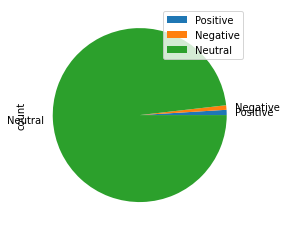

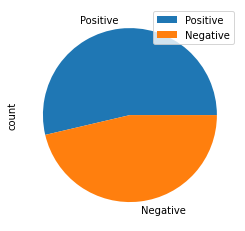

In [95]:
makePie(rtSnippetsTokenized)

## Twitter Sentiment Analysis

In [96]:
tweetSnippets = []
for e in tweets[tweets.columns[0]]: 
    tweetSnippets.append(e)

tweetsTokenized = tokenizer.tokenize(''.join(tweetSnippets))

sentimentDistributionCalc(tweetsTokenized)

POSITIVE: Great example of an important truth: The free flow of information is almost always a very good thing.
POSITIVE: Great example of an important truth: The free flow of information is almost always a very good thing.
POSITIVE: Great example of an important truth: The free flow of information is almost always a very good thing.
POSITIVE: Great example of an important truth: The free flow of information is almost always a very good thing.
NEGATIVE: 102000 dead.
NEGATIVE: 102000 dead.
NEGATIVE: 102000 dead.
NEGATIVE: 102000 dead.
NEGATIVE: A second flu would be awful.
NEGATIVE: A second flu would be awful.
NEGATIVE: A second flu would be awful.
NEGATIVE: A second flu would be awful.
POSITIVE: I appreciate you all.
POSITIVE: I appreciate you all.
POSITIVE: I appreciate you all.
POSITIVE: I appreciate you all.
NEGATIVE: I'm CONFUSED.
NEGATIVE: I'm CONFUSED.
NEGATIVE: I'm CONFUSED.
NEGATIVE: I'm CONFUSED.
POSITIVE: So proud of them.
POSITIVE: So proud of them.
POSITIVE: So proud of th

POSITIVE: Bas corona, please !
POSITIVE: Bas corona, please !
POSITIVE: Bas corona, please !
POSITIVE: Bas corona, please !
POSITIVE: Get well soon!!!U.S.
POSITIVE: Get well soon!!!U.S.
POSITIVE: Get well soon!!!U.S.
POSITIVE: Get well soon!!!U.S.
NEGATIVE: This is scary.
NEGATIVE: This is scary.
NEGATIVE: This is scary.
NEGATIVE: This is scary.
POSITIVE: Like, duh, obviously.
POSITIVE: Like, duh, obviously.
POSITIVE: Like, duh, obviously.
POSITIVE: Like, duh, obviously.
POSITIVE: Dear Leader would never allow such silliness.
POSITIVE: Dear Leader would never allow such silliness.
POSITIVE: Dear Leader would never allow such silliness.
POSITIVE: Dear Leader would never allow such silliness.
NEGATIVE: Over 1,700 are infected.
NEGATIVE: Over 1,700 are infected.
NEGATIVE: Over 1,700 are infected.
NEGATIVE: Over 1,700 are infected.
NEGATIVE: He was scared.
NEGATIVE: He was scared.
NEGATIVE: He was scared.
NEGATIVE: He was scared.
NEGATIVE: THIS SHOULD BE ILLEGAL!
NEGATIVE: THIS SHOULD BE I

POSITIVE: Helping the rich is pointless.
POSITIVE: Helping the rich is pointless.
POSITIVE: Helping the rich is pointless.
POSITIVE: Helping the rich is pointless.
POSITIVE: Stay safe - stay spaced!
POSITIVE: Stay safe - stay spaced!
POSITIVE: Stay safe - stay spaced!
POSITIVE: Stay safe - stay spaced!
NEGATIVE: Democrats very unhappy.
NEGATIVE: Democrats very unhappy.
NEGATIVE: Democrats very unhappy.
NEGATIVE: Democrats very unhappy.
POSITIVE: Thank you.
POSITIVE: Thank you.
POSITIVE: Thank you.
POSITIVE: Thank you.
NEGATIVE: While I still #RefuseToFear, I was WRONG!
NEGATIVE: While I still #RefuseToFear, I was WRONG!
NEGATIVE: While I still #RefuseToFear, I was WRONG!
NEGATIVE: While I still #RefuseToFear, I was WRONG!
NEGATIVE: Shortages ensue.
NEGATIVE: Shortages ensue.
NEGATIVE: Shortages ensue.
NEGATIVE: Shortages ensue.
NEGATIVE: No written notice.
NEGATIVE: No written notice.
NEGATIVE: No written notice.
NEGATIVE: No written notice.
NEGATIVE: No phone call.
NEGATIVE: No phone 

NEGATIVE: #PuertoRico endured: Economic crisis in 2006 Debt crisis in 2016 Disaster crisis (hurricanes) in 2017 Political crisis in 2019 Disaster crisis (earthquakes) in 2020 Coronavirus crisis in 2020.
NEGATIVE: #PuertoRico endured: Economic crisis in 2006 Debt crisis in 2016 Disaster crisis (hurricanes) in 2017 Political crisis in 2019 Disaster crisis (earthquakes) in 2020 Coronavirus crisis in 2020.
NEGATIVE: #PuertoRico endured: Economic crisis in 2006 Debt crisis in 2016 Disaster crisis (hurricanes) in 2017 Political crisis in 2019 Disaster crisis (earthquakes) in 2020 Coronavirus crisis in 2020.
NEGATIVE: #PuertoRico endured: Economic crisis in 2006 Debt crisis in 2016 Disaster crisis (hurricanes) in 2017 Political crisis in 2019 Disaster crisis (earthquakes) in 2020 Coronavirus crisis in 2020.
POSITIVE: Enjoy!
POSITIVE: Enjoy!
POSITIVE: Enjoy!
POSITIVE: Enjoy!
NEGATIVE: RESIGN NOW!
NEGATIVE: RESIGN NOW!
NEGATIVE: RESIGN NOW!
NEGATIVE: RESIGN NOW!
NEGATIVE: Call 911 to report a h

POSITIVE: Please ask for help.
POSITIVE: Please ask for help.
POSITIVE: Please ask for help.
POSITIVE: Please ask for help.
POSITIVE: Reach out.
POSITIVE: Reach out.
POSITIVE: Reach out.
POSITIVE: Reach out.
POSITIVE: Encourage others to join twitter throughout this crisis.
POSITIVE: Encourage others to join twitter throughout this crisis.
POSITIVE: Encourage others to join twitter throughout this crisis.
POSITIVE: Encourage others to join twitter throughout this crisis.
POSITIVE: Proud of them all!
POSITIVE: Proud of them all!
POSITIVE: Proud of them all!
POSITIVE: Proud of them all!
POSITIVE: Enjoy your beer.
POSITIVE: Enjoy your beer.
POSITIVE: Enjoy your beer.
POSITIVE: Enjoy your beer.
POSITIVE: Stay strong, brave soul Chuck Norris has tested positive for the corona virus.
POSITIVE: Stay strong, brave soul Chuck Norris has tested positive for the corona virus.
POSITIVE: Stay strong, brave soul Chuck Norris has tested positive for the corona virus.
POSITIVE: Stay strong, brave soul

POSITIVE: Oh my god.
POSITIVE: Oh my god.
POSITIVE: Oh my god.
POSITIVE: Oh my god.
NEGATIVE: Death threats against Fauci.
NEGATIVE: Death threats against Fauci.
NEGATIVE: Death threats against Fauci.
NEGATIVE: Death threats against Fauci.
POSITIVE: I am so thankful.
POSITIVE: I am so thankful.
POSITIVE: I am so thankful.
POSITIVE: I am so thankful.
POSITIVE: Chris is strong and we’re hopeful he’ll be better soon.
POSITIVE: Chris is strong and we’re hopeful he’ll be better soon.
POSITIVE: Chris is strong and we’re hopeful he’ll be better soon.
POSITIVE: Chris is strong and we’re hopeful he’ll be better soon.
NEGATIVE: How stupid are trumpers?
NEGATIVE: How stupid are trumpers?
NEGATIVE: How stupid are trumpers?
NEGATIVE: How stupid are trumpers?
NEGATIVE: Time to DESTROY Big Pharma.
NEGATIVE: Time to DESTROY Big Pharma.
NEGATIVE: Time to DESTROY Big Pharma.
NEGATIVE: Time to DESTROY Big Pharma.
POSITIVE: Join us!
POSITIVE: Join us!
POSITIVE: Join us!
POSITIVE: Join us!
POSITIVE: Impres

NEGATIVE: Please be safe and heed the guidelines.PHOTO | Fuck Covid-19, Fuck capitalism!
NEGATIVE: Please be safe and heed the guidelines.PHOTO | Fuck Covid-19, Fuck capitalism!
NEGATIVE: Please be safe and heed the guidelines.PHOTO | Fuck Covid-19, Fuck capitalism!
NEGATIVE: Please be safe and heed the guidelines.PHOTO | Fuck Covid-19, Fuck capitalism!
NEGATIVE: It is brutal.
NEGATIVE: It is brutal.
NEGATIVE: It is brutal.
NEGATIVE: It is brutal.
POSITIVE: Raise your hand if you agree.
POSITIVE: Raise your hand if you agree.
POSITIVE: Raise your hand if you agree.
POSITIVE: Raise your hand if you agree.
POSITIVE: Great boozers.
POSITIVE: Great boozers.
POSITIVE: Great boozers.
POSITIVE: Great boozers.
NEGATIVE: She unfortunately died of Coronavirus.
NEGATIVE: She unfortunately died of Coronavirus.
NEGATIVE: She unfortunately died of Coronavirus.
NEGATIVE: She unfortunately died of Coronavirus.
NEGATIVE: I hate this asshole.
NEGATIVE: I hate this asshole.
NEGATIVE: I hate this asshole.

POSITIVE: Thank you all for the love and please take this pandemic seriously.
POSITIVE: Thank you all for the love and please take this pandemic seriously.
POSITIVE: Thank you all for the love and please take this pandemic seriously.
POSITIVE: Thank you all for the love and please take this pandemic seriously.
POSITIVE: I love her a lot and am so proud.
POSITIVE: I love her a lot and am so proud.
POSITIVE: I love her a lot and am so proud.
POSITIVE: I love her a lot and am so proud.
POSITIVE: Protect yourself.
POSITIVE: Protect yourself.
POSITIVE: Protect yourself.
POSITIVE: Protect yourself.
POSITIVE: A joke?
POSITIVE: A joke?
POSITIVE: A joke?
POSITIVE: A joke?
NEGATIVE: No.
NEGATIVE: No.
NEGATIVE: No.
NEGATIVE: No.
NEGATIVE: it’s really strange!
NEGATIVE: it’s really strange!
NEGATIVE: it’s really strange!
NEGATIVE: it’s really strange!
POSITIVE: We can save lives."
POSITIVE: We can save lives."
POSITIVE: We can save lives."
POSITIVE: We can save lives."
NEGATIVE: #TrumpPressBriefin

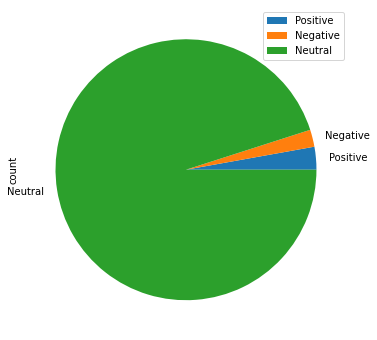

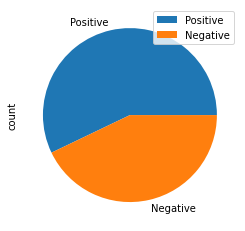

In [102]:
makePie(tweetsTokenized)

## Scientific Article Sentiment Analysis

In [98]:
articleSnippets = []
for e in LastYwD[LastYwD.columns[0]]: 
    articleSnippets.append(e)

articlesTokenized = tokenizer.tokenize(''.join(articleSnippets))

sentimentDistributionCalc(articleSnippets)

Percentage positive: 0.0
Percentage negative: 0.0
Percentage neutral: 100.0
